In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('ניקוי מעודכן סופי')

In [6]:
df = df.drop(df[df['SSD'] == 1280].index)
df = df.drop(df[df['RAMSize'] > 64].index)
df = df.drop(df[df['ProcessorSpeed'] > 3.5].index)
df

,Condition,Brand,Price,ProcessorSpeed,RAMSize,ScreenSize,ReleaseYear,SSD,Touchscreen,Webcam,OpticalDrive,NumDifferentUSBTypes,TotalUSBConnections,Length,Width
0,1,2,1672.17,2.3,32,17.3,2022.0,1000,1,1,0,2,3,1920.0,1080.0
1,0,4,2999.99,2.2,64,16.0,2023.0,2000,1,1,0,1,2,3200.0,2000.0
2,1,1,950.00,2.7,32,16.0,2023.0,512,0,1,0,2,4,1920.0,1200.0
3,1,2,1799.99,2.4,32,16.0,2023.0,1000,0,1,0,3,4,2560.0,1600.0
4,1,2,1199.00,2.3,16,15.6,2022.0,1000,0,1,0,3,4,1920.0,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,1,762.34,2.3,8,14.0,2022.0,256,0,1,0,0,0,1920.0,1080.0
3002,0,3,639.99,2.4,16,15.0,2022.0,1000,1,1,1,0,0,1366.0,768.0
3003,0,4,1549.99,2.3,16,15.6,2023.0,1000,0,1,0,3,3,2880.0,1620.0
3004,1,5,1199.99,2.4,16,14.0,2023.0,512,0,1,1,0,0,1920.0,1080.0


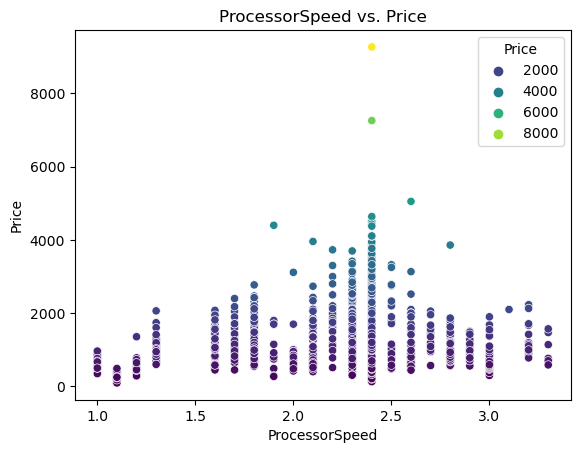

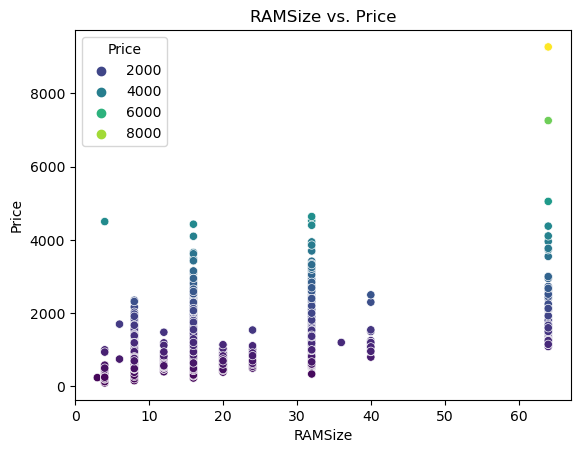

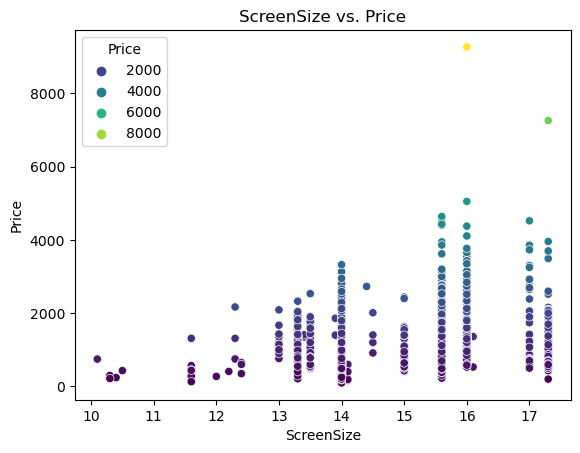

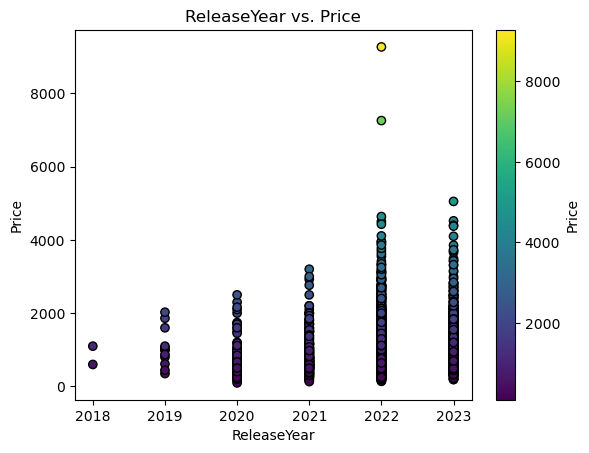

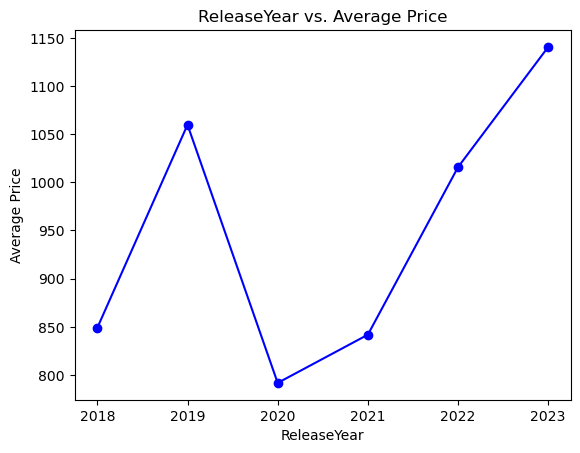

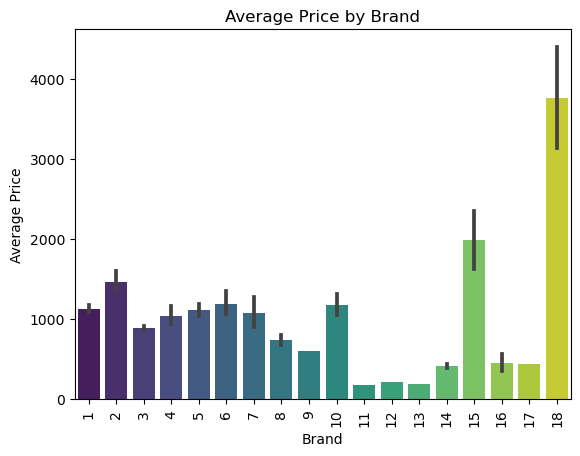

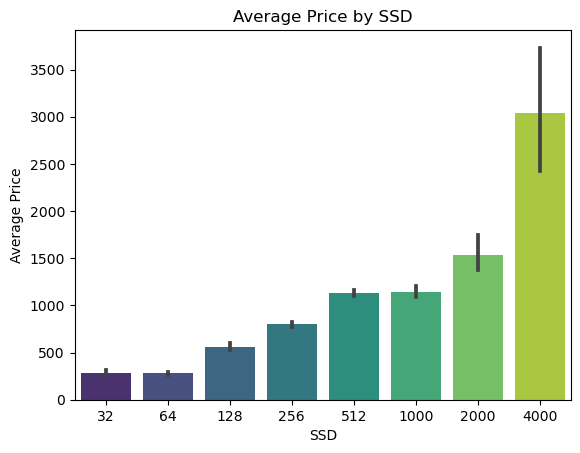

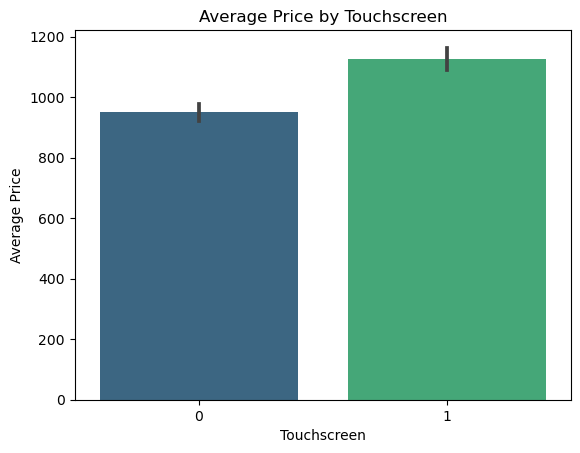

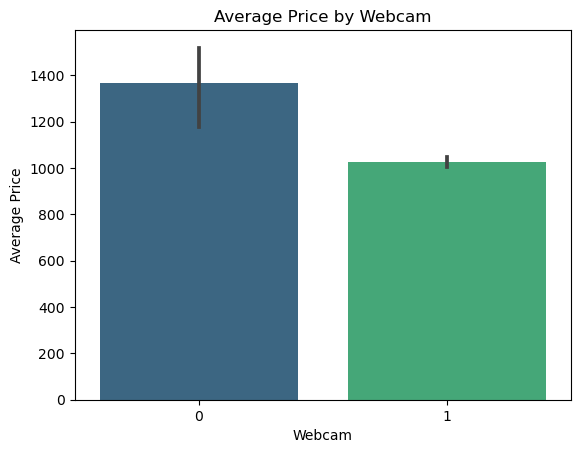

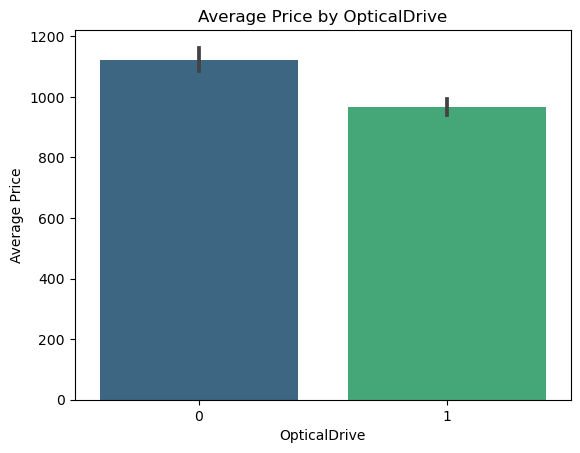

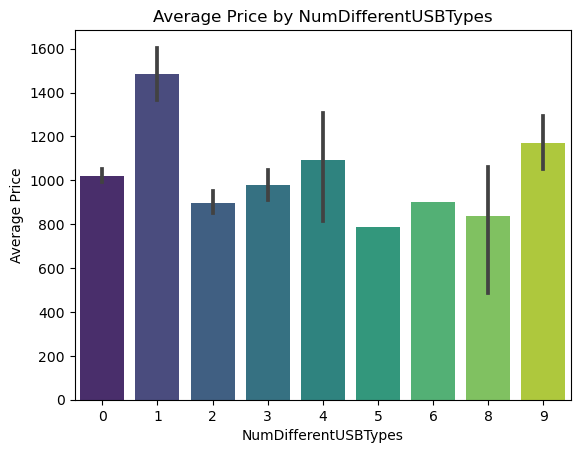

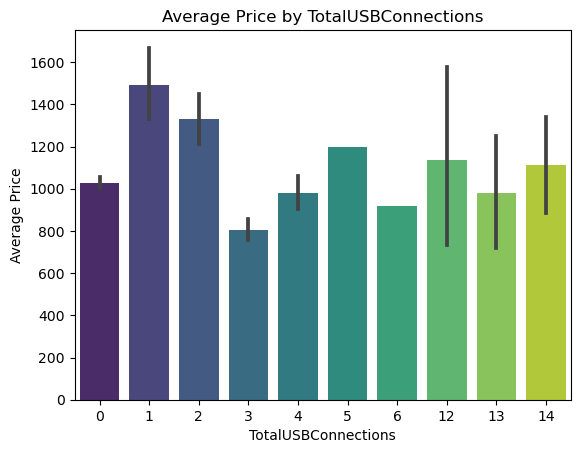

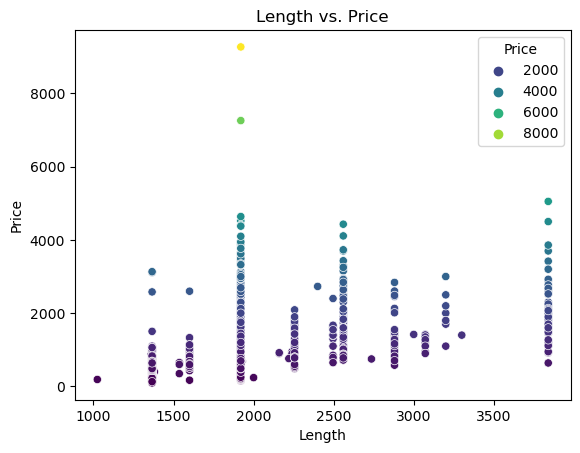

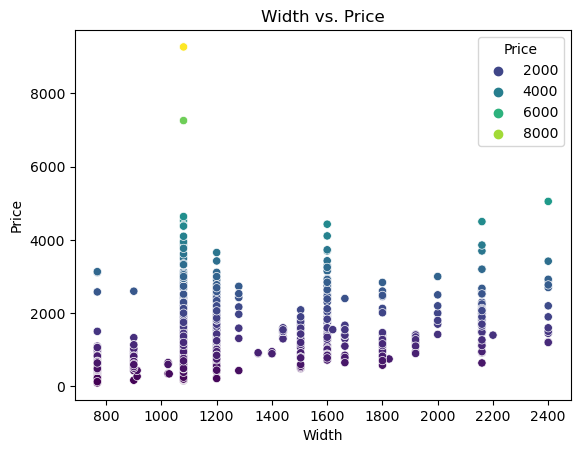

In [7]:

# Scatter plot: ProcessorSpeed vs. Price
sns.scatterplot(data=df, x='ProcessorSpeed', y='Price', hue='Price', palette='viridis')
plt.xlabel('ProcessorSpeed')
plt.ylabel('Price')
plt.title('ProcessorSpeed vs. Price')
plt.show()

# Scatter plot: RAMSize vs. Price
sns.scatterplot(data=df, x='RAMSize', y='Price', hue='Price', palette='viridis')
plt.xlabel('RAMSize')
plt.ylabel('Price')
plt.title('RAMSize vs. Price')
plt.show()

# Scatter plot: ScreenSize vs. Price
sns.scatterplot(data=df, x='ScreenSize', y='Price', hue='Price', palette='viridis')
plt.xlabel('ScreenSize')
plt.ylabel('Price')
plt.title('ScreenSize vs. Price')
plt.show()



# Scatter plot: ReleaseYear vs. Price
scatter = plt.scatter(df['ReleaseYear'], df['Price'], c=df['Price'], cmap='viridis', edgecolor='black')
plt.xlabel('ReleaseYear')
plt.ylabel('Price')
plt.title('ReleaseYear vs. Price')

# Create a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

plt.show()

# Group the data by ReleaseYear and calculate the average Price for each year
avg_price_by_year = df.groupby('ReleaseYear')['Price'].mean()

# Line plot: ReleaseYear vs. Average Price
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-', color='blue')
plt.xlabel('ReleaseYear')
plt.ylabel('Average Price')
plt.title('ReleaseYear vs. Average Price')

plt.show()


# Bar plot: Average Price by Brand
sns.barplot(data=df, x='Brand', y='Price', palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.xticks(rotation=90)
plt.show()

# Bar plot: Average Price by SSD
sns.barplot(data=df, x='SSD', y='Price', palette='viridis')
plt.xlabel('SSD')
plt.ylabel('Average Price')
plt.title('Average Price by SSD')
plt.show()

# Bar plot: Average Price by Touchscreen
sns.barplot(data=df, x='Touchscreen', y='Price', palette='viridis')
plt.xlabel('Touchscreen')
plt.ylabel('Average Price')
plt.title('Average Price by Touchscreen')
plt.show()

# Bar plot: Average Price by Webcam
sns.barplot(data=df, x='Webcam', y='Price', palette='viridis')
plt.xlabel('Webcam')
plt.ylabel('Average Price')
plt.title('Average Price by Webcam')
plt.show()

# Bar plot: Average Price by OpticalDrive
sns.barplot(data=df, x='OpticalDrive', y='Price', palette='viridis')
plt.xlabel('OpticalDrive')
plt.ylabel('Average Price')
plt.title('Average Price by OpticalDrive')
plt.show()

# Bar plot: Average Price by NumDifferentUSBTypes
sns.barplot(data=df, x='NumDifferentUSBTypes', y='Price', palette='viridis')
plt.xlabel('NumDifferentUSBTypes')
plt.ylabel('Average Price')
plt.title('Average Price by NumDifferentUSBTypes')
plt.show()

# Bar plot: Average Price by TotalUSBConnections
sns.barplot(data=df, x='TotalUSBConnections', y='Price', palette='viridis')
plt.xlabel('TotalUSBConnections')
plt.ylabel('Average Price')
plt.title('Average Price by TotalUSBConnections')
plt.show()

# Scatter plot: Length vs. Price
sns.scatterplot(data=df, x='Length', y='Price', hue='Price', palette='viridis')
plt.xlabel('Length')
plt.ylabel('Price')
plt.title('Length vs. Price')
plt.show()

# Scatter plot: Width vs. Price
sns.scatterplot(data=df, x='Width', y='Price', hue='Price', palette='viridis')
plt.xlabel('Width')
plt.ylabel('Price')
plt.title('Width vs. Price')
plt.show()



In [8]:
# Check if 'Length' column has any zero values
has_zero_length = (df['Length'] == 0).any()

# Check if 'Width' column has any zero values
has_zero_width = (df['Width'] == 0).any()

print("Zero values in 'Length':", has_zero_length)
print("Zero values in 'Width':", has_zero_width)

Zero values in 'Length': False
Zero values in 'Width': False


In [9]:
# Define the price range
min_price = 400
max_price = 500

# Filter the dataframe based on price condition
filtered_items = df[(df['Price'] >= min_price) & (df['Price'] <= max_price)]

# Print the filtered items
print(filtered_items)
df[df['SSD']==1280]

      Condition  Brand   Price  ProcessorSpeed  RAMSize  ScreenSize  \
38            0      3  499.99             2.4       16        15.6   
39            0      5  419.00             2.4        4        15.6   
65            1      5  428.79             2.4        8        15.6   
82            0      1  449.99             2.4        4        15.6   
87            1      4  419.00             2.4       16        14.0   
...         ...    ...     ...             ...      ...         ...   
2964          1      3  479.99             2.0        8        14.0   
2979          1      1  499.99             1.0        8        17.0   
2980          1      8  499.78             2.4        8        15.6   
2992          1      3  487.00             2.4        8        15.6   
2996          0      3  489.99             1.1       16        14.0   

      ReleaseYear  SSD  Touchscreen  Webcam  OpticalDrive  \
38         2023.0  256            0       1             1   
39         2022.0  128   

,Condition,Brand,Price,ProcessorSpeed,RAMSize,ScreenSize,ReleaseYear,SSD,Touchscreen,Webcam,OpticalDrive,NumDifferentUSBTypes,TotalUSBConnections,Length,Width


In [10]:
df = df.drop(['Condition'], axis=1)

In [11]:
df

,Brand,Price,ProcessorSpeed,RAMSize,ScreenSize,ReleaseYear,SSD,Touchscreen,Webcam,OpticalDrive,NumDifferentUSBTypes,TotalUSBConnections,Length,Width
0,2,1672.17,2.3,32,17.3,2022.0,1000,1,1,0,2,3,1920.0,1080.0
1,4,2999.99,2.2,64,16.0,2023.0,2000,1,1,0,1,2,3200.0,2000.0
2,1,950.00,2.7,32,16.0,2023.0,512,0,1,0,2,4,1920.0,1200.0
3,2,1799.99,2.4,32,16.0,2023.0,1000,0,1,0,3,4,2560.0,1600.0
4,2,1199.00,2.3,16,15.6,2022.0,1000,0,1,0,3,4,1920.0,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,762.34,2.3,8,14.0,2022.0,256,0,1,0,0,0,1920.0,1080.0
3002,3,639.99,2.4,16,15.0,2022.0,1000,1,1,1,0,0,1366.0,768.0
3003,4,1549.99,2.3,16,15.6,2023.0,1000,0,1,0,3,3,2880.0,1620.0
3004,5,1199.99,2.4,16,14.0,2023.0,512,0,1,1,0,0,1920.0,1080.0


<AxesSubplot:>

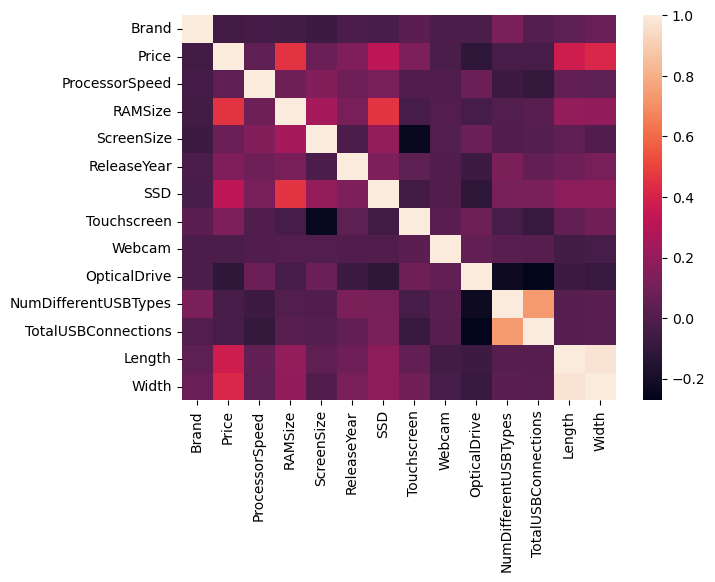

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr())

In [13]:
df = df.drop(['NumDifferentUSBTypes','Length'], axis=1)

In [14]:
df.to_csv('1111ניקוי מעודכן סופי', index=False)